In [25]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [26]:
height, width = 200, 200

hist_threshold = 100

In [27]:
img = Image.open('../assets/shiba_inu.jpeg').resize((height, width)).convert('L')
arr = np.array(img)

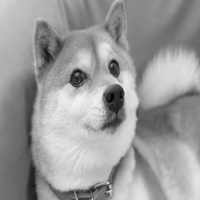

In [28]:
display(img)

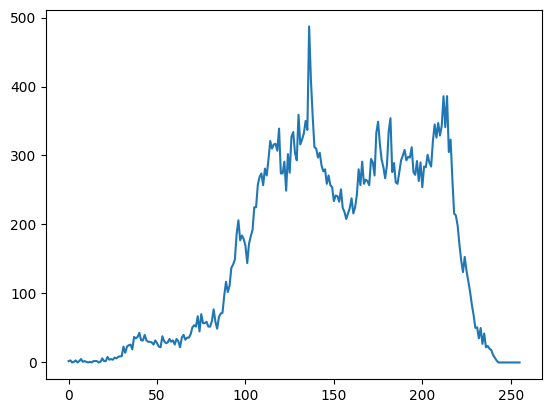

In [29]:
plt.plot(img.histogram())

In [30]:
hist = img.histogram()

min_r, max_r = 0, 255

for i in range(256):
    if hist[i] < hist_threshold:
        min_r = i
    else:
        break

for i in range(255, -1, -1):
    if hist[i] < hist_threshold:
        max_r = i
    else:
        break

for i in range(height):
    for j in range(width):
        if arr[i, j] < min_r:
            arr[i, j] = min_r
        elif arr[i, j] > max_r:
            arr[i, j] = max_r

In [31]:
print(min_r, max_r)

88 228


In [32]:
flat = arr.flatten()

for i in range(len(flat)):
    flat[i] = round(255 * (int(flat[i]) - int(min_r)) / (int(max_r) - int(min_r)))

In [33]:
betterimg = Image.new('L', (height, width))
betterimg.putdata(flat)

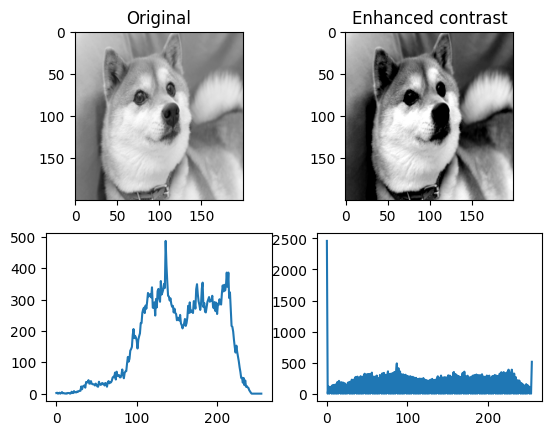

In [34]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(img, 'gray')
axes[0, 0].set_title('Original')
axes[1, 0].plot(img.histogram())
axes[0, 1].imshow(betterimg, 'gray')
axes[0, 1].set_title('Enhanced contrast')
axes[1, 1].plot(betterimg.histogram())

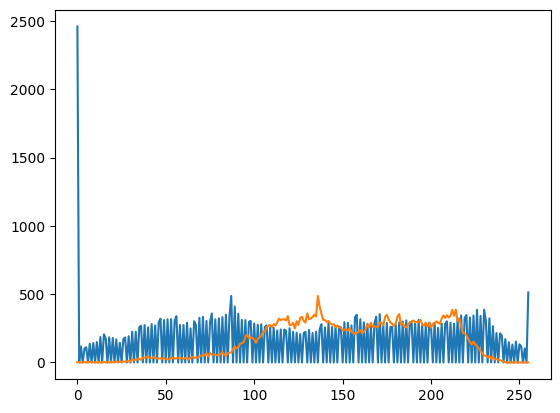

In [35]:
plt.plot(betterimg.histogram())
plt.plot(img.histogram())